In [2]:
from google.colab import drive
%pip install ipython-sql sqlalchemy
%load_ext sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [4]:
file_url = 'https://drive.google.com/file/d/1g9Oxdv9iJY7qJNCM7wyGJv2fijiAsvyh/view?usp=sharing'
file_id = file_url.split('/')[-2]
export_url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(export_url)

engine = create_engine('sqlite://', echo=False)
df.to_sql('superstore', con=engine, if_exists='replace', index=False)
%sql sqlite://


In [ ]:
query = """SELECT 
    * FROM superstore"""

result = pd.read_sql_query(query, engine)
display(result)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Pembersihan Data:

Cek Missing Values: Periksa apakah ada nilai yang hilang/kosong (missing value) dalam dataset (misalnya di kolom Profit atau Postal Code). Gunakan fitur filter atau fungsi seperti COUNTBLANK untuk mendeteksi sel kosong. Jika terdapat nilai kosong, tentukan cara penanganannya – misalnya, mengisi dengan nilai tertentu (seperti rata-rata/median untuk kolom numerik) atau kategori “Unknown” untuk kolom teks, atau menghapus baris tersebut.

Format Konsisten: Pastikan format data sudah konsisten. Contohnya, periksa kolom kategori seperti Category atau Region agar tidak ada duplikasi akibat ejaan berbeda (misal: “Office Supplies” vs “OfficeSupply” – jika ada, samakan penulisannya). Juga pastikan kolom numerik (seperti Sales dan Profit) diinterpretasikan sebagai number oleh Excel – tidak ada karakter asing seperti simbol mata uang atau spasi yang tersembunyi. Jika menemukan format tidak konsisten, bersihkan format tersebut (misalnya, gunakan fungsi TRIM untuk menghapus spasi berlebih atau remove duplicates untuk entries duplikat jika diperlukan).

In [28]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Perhitungan Statistik Dasar: Gunakan fungsi Excel (SUM, AVERAGE, MIN, MAX) untuk menghitung statistik berikut pada kolom-kolom penting:

Total Penjualan: Hitung total nilai Sales seluruh transaksi (gunakan SUM pada kolom Sales) untuk mengetahui jumlah penjualan keseluruhan.

Rata-rata Profit: Hitung nilai rata-rata Profit per transaksi (gunakan AVERAGE pada kolom Profit) untuk mengetahui profit rata-rata.

Nilai Maksimum & Minimum: Cari nilai penjualan tertinggi dan terendah per transaksi (gunakan MAX dan MIN pada kolom Sales). Catat berapa nilai transaksi terbesar dan terkecil tersebut. Lakukan hal yang sama untuk kolom Profit – periksa profit maksimum dan minimum. (Apakah ada nilai profit negatif? Jika ya, berarti ada transaksi yang merugi.)

Statistik Lain (Opsional): Anda dapat mencoba menghitung jumlah transaksi (COUNT) atau nilai rata-rata diskon (AVERAGE kolom Discount) jika diperlukan untuk analisis tambahan.

In [59]:
query_profit_shipmode = """
SELECT
    "Ship Mode", SUM(Profit) AS Profit
FROM
    superstore
GROUP BY
    "Ship Mode"
order BY
    Profit DESC
"""

result_profit_shipmode = pd.read_sql_query(query_profit_shipmode, engine)
display(result_profit_shipmode)

,Ship Mode,Profit
0,Standard Class,164088.7875
1,Second Class,57446.6354
2,First Class,48969.8399
3,Same Day,15891.7589


In [63]:
query_discount_category = """
SELECT
    Category, AVG(Discount) AS Average_Discount
FROM
    superstore
GROUP BY
    Category
ORDER BY
    Average_Discount DESC
"""

result_discount_category = pd.read_sql_query(query_discount_category, engine)
display(result_discount_category)

,Category,Average_Discount
0,Furniture,0.173923
1,Office Supplies,0.157285
2,Technology,0.132323


In [79]:
query_profit_category = """
SELECT
    Category, SUM(Profit) AS Total_Profit
FROM
    superstore
GROUP BY
    Category
ORDER BY
    Total_Profit DESC
"""

result_profit_category = pd.read_sql_query(query_profit_category, engine)
display(result_profit_category)

,Category,Total_Profit
0,Technology,145454.9481
1,Office Supplies,122490.8008
2,Furniture,18451.2728


In [39]:
query_max_profit = """
SELECT *, MAX(Profit) AS Max_Profit
FROM superstore
WHERE Profit = (SELECT MAX(Profit) FROM superstore)
"""

result = pd.read_sql_query(query_max_profit, engine)
display(result)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Max_Profit
0,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976,8399.976


In [40]:
query_min_profit = """
SELECT *, MIN(Profit) AS Min_Profit
FROM superstore
WHERE Profit = (SELECT MIN(Profit) FROM superstore)
"""
result = pd.read_sql_query(query_min_profit, engine)
display(result)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Min_Profit
0,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978,-6599.978


In [65]:
query_total_sales_region = """
SELECT
    Region, SUM(Sales) AS Total_Sales
FROM
    superstore
GROUP BY
    Region
ORDER BY
    Total_Sales DESC
"""
result_total_sales_region = pd.read_sql_query(query_total_sales_region, engine)
display(result_total_sales_region)

,Region,Total_Sales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


In [90]:
query_west_category_profit = """
SELECT
    Category, SUM(Profit) AS Total_Profit
FROM
    superstore
WHERE
    Region = 'West'
GROUP BY
    Category
ORDER BY
    Total_Profit DESC
"""
result_west_category_profit = pd.read_sql_query(query_west_category_profit, engine)
display(result_west_category_profit)

,Category,Total_Profit
0,Office Supplies,52609.8490
1,Technology,44303.6496
2,Furniture,11504.9503


In [91]:
query_sales_west = """
SELECT
    SUM(Sales) AS Total_Sales_West
FROM
    superstore
WHERE
    Region = 'West'
"""
result_sales_west = pd.read_sql_query(query_sales_west, engine)
display(result_sales_west)

,Total_Sales_West
0,725457.8245


In [42]:
query_avg_profit_transaction = """
SELECT
    AVG(Profit) AS Average_Profit_Per_Transaction
FROM
    superstore
"""
result = pd.read_sql_query(query_avg_profit_transaction, engine)
display(result)

,Average_Profit_Per_Transaction
0,28.656896


In [43]:
query_total_transaction_south = """
SELECT
    REGION, COUNT(*) AS Total_Transactions
FROM
    superstore
WHERE
    REGION = 'South'
GROUP BY
    REGION
"""

result = pd.read_sql_query(query_total_transaction_south, engine)
display(result)

,Region,Total_Transactions
0,South,1620


Sortir dan Filter Data:

Sorting: Urutkan data berdasarkan Sales dari yang terbesar ke terkecil (descending). Identifikasilah transaksi dengan nilai penjualan tertinggi. (Sebagai panduan: setelah di-sort, baris teratas akan menunjukkan penjualan terbesar.) Selanjutnya, urutkan juga berdasarkan Profit dari terbesar ke terkecil. Perhatikan 5 transaksi teratas dengan profit tertinggi, dan juga perhatikan apakah ada transaksi dengan profit negatif di bagian terbawah setelah diurutkan.

Filtering: Gunakan fitur filter untuk menyaring data sesuai kriteria tertentu. Misalnya, filter kolom Category sehingga hanya menampilkan data untuk kategori Furniture saja. Setelah terfilter, hitung total Sales untuk kategori Furniture tersebut (Anda bisa menggunakan fitur Subtotal di Excel atau menjumlahkan secara manual nilai Sales yang terfilter). Catat berapa total penjualan di kategori Furniture dan berapa jumlah baris transaksi pada kategori tersebut. Kemudian, coba ganti filter ke kategori lain (misal Office Supplies atau Technology) dan bandingkan total penjualannya dengan kategori Furniture. (Tujuan langkah ini: melatih penggunaan filter dan memahami perbedaan penjualan antar kategori produk.)

In [44]:
query_sorted_sales = """
SELECT
    *
FROM
    superstore
ORDER BY
    Sales DESC
"""

result = pd.read_sql_query(query_sorted_sales, engine)
display(result)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
1,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
2,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
3,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Same Day,Corporate,United States,Mesquite,Texas,75150,Central,Office Supplies,Binders,0.876,1,0.8,-1.4016
9990,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Binders,0.852,1,0.7,-0.5964
9991,Standard Class,Corporate,United States,Chicago,Illinois,60623,Central,Office Supplies,Binders,0.836,1,0.8,-1.3376
9992,Same Day,Corporate,United States,Waco,Texas,76706,Central,Office Supplies,Binders,0.556,1,0.8,-0.9452


In [56]:
query_furniture_and_total = """
SELECT
    *,
    SUM(Sales) OVER () AS Total_Sales
FROM
    superstore
WHERE
    Category = 'Furniture'
"""

query_office_supplies_and_total = """
SELECT
    *,
    SUM(Sales) OVER () AS Total_Sales
FROM
    superstore
WHERE
    Category = 'Office Supplies'
"""

query_technology_and_total = """
SELECT
    *,
    SUM(Sales) OVER () AS Total_Sales
FROM
    superstore
WHERE
    Category = 'Technology'
"""

result_furniture = pd.read_sql_query(query_furniture_and_total, engine)
result_office_supplies = pd.read_sql_query(query_office_supplies_and_total, engine)
result_technology = pd.read_sql_query(query_technology_and_total, engine)
display(result_furniture)
display(result_office_supplies)
display(result_technology)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total_Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,741999.7953
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,741999.7953
2,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,741999.7953
3,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,741999.7953
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092,741999.7953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704,741999.7953
2117,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,Furnishings,13.4000,1,0.00,6.4320,741999.7953
2118,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.9800,1,0.00,22.3548,741999.7953
2119,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,741999.7953


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total_Sales
0,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714,719047.032
1,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164,719047.032
2,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656,719047.032
3,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825,719047.032
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700,719047.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7,0.0,16.7132,719047.032
6022,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200,719047.032
6023,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240,719047.032
6024,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200,719047.032


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total_Sales
0,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152,836154.033
1,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.424,4,0.2,68.3568,836154.033
2,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,213.480,3,0.2,16.0110,836154.033
3,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,90.570,3,0.0,11.7741,836154.033
4,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737,836154.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Technology,Phones,97.980,2,0.0,27.4344,836154.033
1843,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208,836154.033
1844,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964,836154.033
1845,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470,836154.033


In [57]:
query_summary = """
SELECT
    Category,
    SUM(Sales) AS Total_Sales
FROM
    superstore
WHERE
    Category IN ('Furniture', 'Office Supplies', 'Technology')
GROUP BY
    Category
"""

result_summary = pd.read_sql_query(query_summary, engine)
display(result_summary)

,Category,Total_Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


Insight dari Hasil Analisis: Tuliskan minimal 2 insight (temuan) yang Anda peroleh berdasarkan hasil eksplorasi dan visualisasi data di atas. Insight dapat berupa hal-hal menarik atau penting tentang bisnis yang tergambar dari data. Misalnya:

Perbandingan Kategori: Dari grafik batang per kategori, kategori produk mana yang memiliki total penjualan paling tinggi? Mana yang paling rendah? Apa artinya bagi bisnis toko retail tersebut?

Profitabilitas: Apakah ada kategori atau segmen pelanggan tertentu yang sangat menguntungkan atau merugikan? (Contoh insight: “Kategori Furniture memiliki total penjualan tinggi tapi profit relatif rendah dibanding kategori lain, kemungkinan karena margin profit lebih kecil.”)

Tren Waktu: Jika Anda membuat grafik tren waktu, adakah pola musiman atau tren peningkatan/penurunan penjualan dari waktu ke waktu? (Contoh: “Penjualan cenderung meningkat pada Q4 setiap tahun, mungkin karena musim liburan.”)

Temuan Lain: Insight bisa juga berupa temuan seperti region mana yang penjualannya tertinggi, produk/sub-kategori apa yang paling laris, atau presentase transaksi yang merugi. Pilihlah setidaknya dua poin insight yang menurut Anda paling menarik dan jelaskan secara singkat.

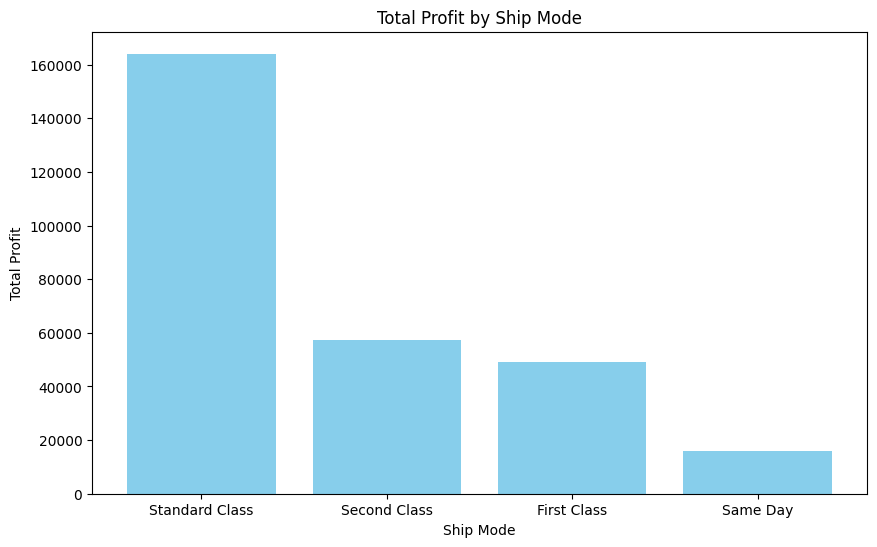

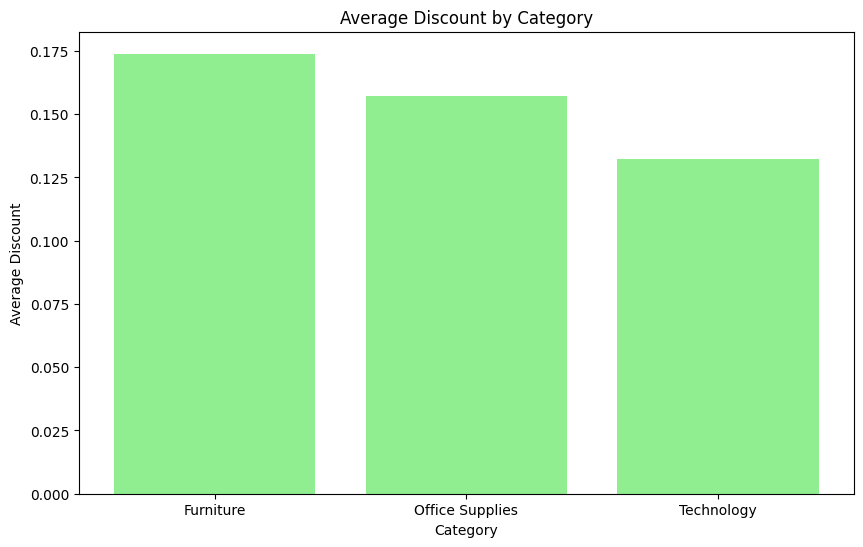

In [64]:
## Grafik Profit Ship Mode

plt.figure(figsize=(10, 6))
plt.bar(result_profit_shipmode['Ship Mode'], result_profit_shipmode['Profit'], color='skyblue')
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.show()

## Grafik Average Discount by Category

plt.figure(figsize=(10, 6))
plt.bar(result_discount_category['Category'], result_discount_category['Average_Discount'], color='lightgreen')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.show()

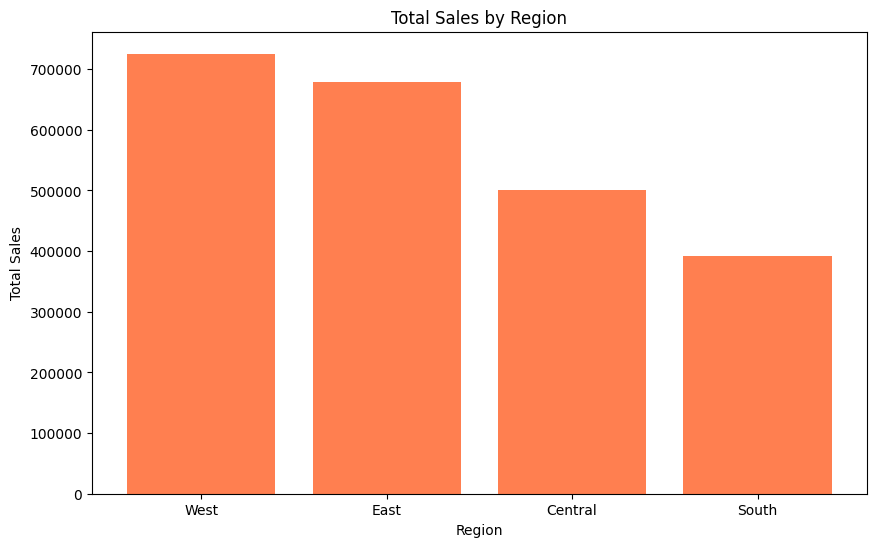

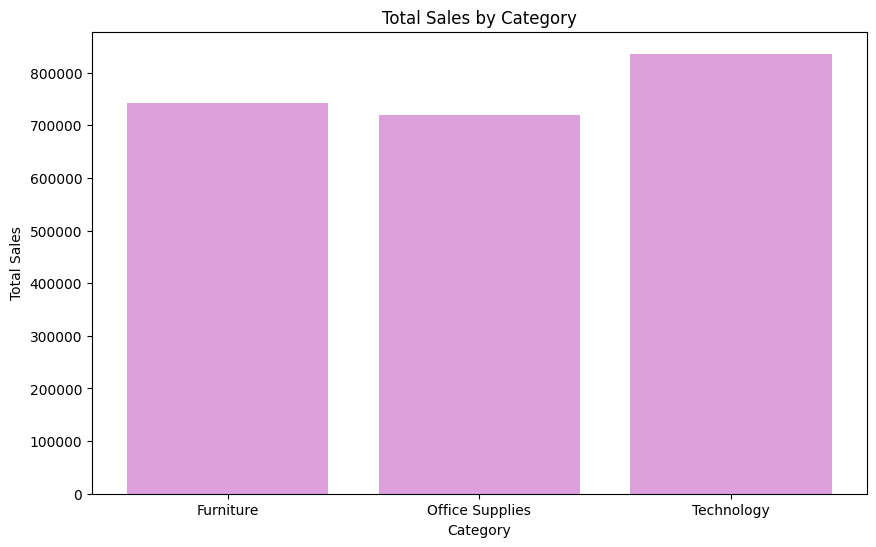

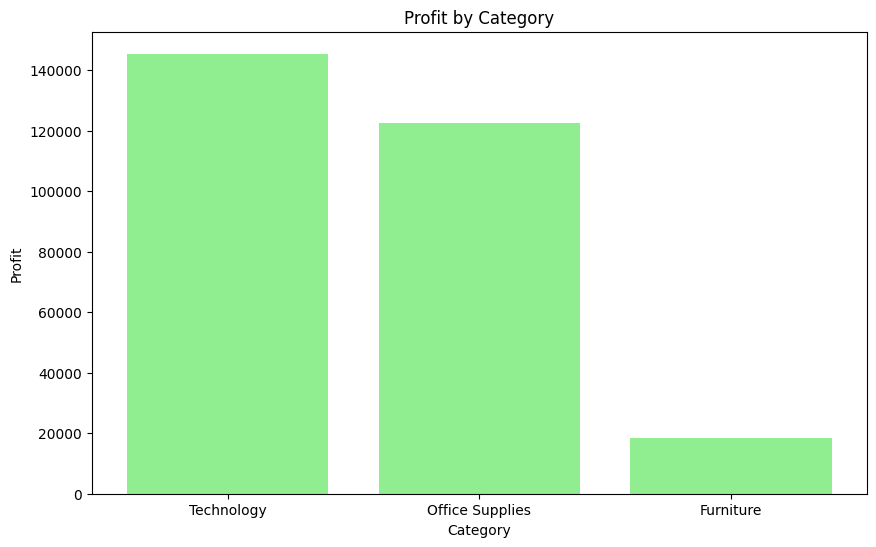

In [70]:
## Grafik Total Sales by Region

plt.figure(figsize=(10, 6))
plt.bar(result_total_sales_region['Region'], result_total_sales_region['Total_Sales'], color='coral')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

## Grafik Summary Total Sales by Category
plt.figure(figsize=(10, 6))
plt.bar(result_summary['Category'], result_summary['Total_Sales'], color='plum')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

## Grafik Profit by Category
plt.figure(figsize=(10, 6))
plt.bar(result_profit_category['Category'], result_profit_category['Total_Profit'], color='lightgreen')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

**Analisis Profitabilitas dan Performa Penjualan**

1. Analisis Mode Pengiriman: Profit terbesar dihasilkan oleh Standard Class, sedangkan profit terendah berasal dari Same Day. Hal ini kemungkinan disebabkan oleh biaya layanan Same Day yang tinggi, sehingga pelanggan cenderung memilih opsi yang lebih ekonomis seperti Standard Class.

2. Evaluasi Strategi Diskon & Kategori: Pemberian diskon besar pada kategori Furniture terbukti efektif meningkatkan angka penjualan (Sales), namun hal ini tidak sejalan dengan        profitabilitas yang justru menjadi paling kecil. Sebaliknya, kategori Technology mencatatkan profit tertinggi.
    Rekomendasi: Terdapat peluang untuk meningkatkan repeat order pada kategori Technology dengan menerapkan strategi promosi atau diskon terukur, mengingat kategori ini memiliki margin keuntungan yang sehat.

3. Identifikasi Kerugian (Negative Profit): Ditemukan sejumlah transaksi yang menghasilkan profit negatif (kerugian). Hal ini memerlukan evaluasi mendalam untuk menemukan akar masalahnya. Meskipun data biaya operasional saat ini terbatas, hipotesis awal mengarah pada tingginya beban biaya pengiriman (Ship Mode) pada transaksi tertentu yang menggerus keuntungan.

4. Performa Wilayah & Produk: Secara geografis, Region West mendominasi penjualan tertinggi, sementara Region South memiliki penjualan terendah. Dari sisi produk, kategori Office Supplies menjadi kontributor utama terhadap stabilitas profit perusahaan secara keseluruhan